# **<font color='#33b8ff'> Phase 1 </font>**

# **1. Framing the Problem**

An overview of your problem and what are you predicting.

**Objective and Problem Framing**

Objective

The primary objective of this assignment is to find a suitable dataset for the main machine learning course project (the Titanic dataset was chosen), understand the associated problem domain very well, and determine the overall framework, including the following points determined for this problem:

* **Problem Domain Understanding:** Analyzing the Titanic passenger data to understand the factors influencing survival from the sinking.
* **Machine Learning Style:** The appropriate style identified is **Supervised Learning**, due to the availability of labeled data (knowing the survival outcome for each passenger).
* **Machine Learning Model Type:** The required model type identified is **Classification**, because the goal is to predict a discrete category (survived / did not survive).

---

1. Framing the Problem

* **Problem Overview:**
    This task aims to explore and analyze the Titanic passenger dataset to understand the factors that influenced their survival after the ship sank. This problem is a classic case in machine learning, specifically in data classification. This is approached using **Supervised Learning**, as we possess historical data for passengers (features) and know the final outcome for each (survived or not - which is the 'label'), enabling us to train a model to learn this relationship.

* **What are you predicting?:**
    The goal of this task, and ultimately the main project, is to predict whether a passenger would survive the Titanic disaster or not. In other words, we are trying to build a machine learning model capable of **classifying** passengers into two categories: Survived (`Survived=1`) or Did not survive (`Survived=0`).

---



---



Libraries and Datasets

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading training data
train_data = pd.read_csv('train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* The training data contains 891 rows and 12 columns, with mixed data types (int64, float64, object).
* The output reveals missing values ​​in the following columns: Age, Cabin, and Embarked.

In [116]:
# Initial look at the dataset
print(train_data.shape)
train_data.info()

(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB




---



# **2. Data Summary**

Compute basic statistics such as mean, median, standard deviation, minimum, maximum, and quartiles for numerical features. For categorical features, calculate the frequency distribution of each category.

Identifying numerical and categorical features

In [117]:
# Identifying numerical features
numerical_features = train_data.select_dtypes(include=['number']).columns.tolist()

# Remove 'PassengerId' and 'Survived' from the list because we do not want to calculate descriptive statistics for them in this context
numerical_features.remove('PassengerId')
if 'Survived' in numerical_features:
    numerical_features.remove('Survived')

# Identifying categorical features
categorical_features = train_data.select_dtypes(include=['object']).columns.tolist()

Calculating basic statistics for numerical features

```
Numerical Features:
Pclass: Average passenger class is around 2.3 (most are in 3rd class).
Age: Average passenger age is around 29.7 years, but there are missing values as the count is 714 and not 891.
SibSp: Average number of siblings/spouses aboard is low (0.52).
Parch: Average number of parents/children aboard is low (0.38).
Fare: Average fare is around $32.2, with high variation (standard deviation 49.69).
```

In [118]:
# Calculating descriptive statistics for numerical features
numerical_summary = train_data[numerical_features].describe()
print("Basic statistics for numerical features:\n", numerical_summary)

Basic statistics for numerical features:
            Pclass         Age       SibSp       Parch        Fare
count  891.000000  714.000000  891.000000  891.000000  891.000000
mean     2.308642   29.699118    0.523008    0.381594   32.204208
std      0.836071   14.526497    1.102743    0.806057   49.693429
min      1.000000    0.420000    0.000000    0.000000    0.000000
25%      2.000000   20.125000    0.000000    0.000000    7.910400
50%      3.000000   28.000000    0.000000    0.000000   14.454200
75%      3.000000   38.000000    1.000000    0.000000   31.000000
max      3.000000   80.000000    8.000000    6.000000  512.329200


Calculating frequency distribution for categorical features

```
Categorical Features:
Name: Each name is unique, as expected.
Sex: Most passengers were male (577) compared to females (314).
Ticket: There are many duplicate tickets, this likely indicates groups of people traveling together on the same ticket.
Cabin: Most cabin values are missing (only 147 unique values out of 891).
Embarked: Most passengers embarked from Southampton (S), then Cherbourg (C), and the fewest from Queenstown (Q).
```

In [119]:
print("\nFrequency distribution for categorical features:")

for feature in categorical_features:
    frequency_distribution = train_data[feature].value_counts()

    print(f"\nFrequency distribution for the feature'{feature}':\n{frequency_distribution}")


Frequency distribution for categorical features:

Frequency distribution for the feature'Name':
Name
Dooley, Mr. Patrick                                    1
Braund, Mr. Owen Harris                                1
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    1
Heikkinen, Miss. Laina                                 1
Futrelle, Mrs. Jacques Heath (Lily May Peel)           1
                                                      ..
Hewlett, Mrs. (Mary D Kingcome)                        1
Vestrom, Miss. Hulda Amanda Adolfina                   1
Andersson, Mr. Anders Johan                            1
Saundercock, Mr. William Henry                         1
Bonnell, Miss. Elizabeth                               1
Name: count, Length: 891, dtype: int64

Frequency distribution for the feature'Sex':
Sex
male      577
female    314
Name: count, dtype: int64

Frequency distribution for the feature'Ticket':
Ticket
347082              7
1601                7
CA. 2343            7
310129



---



# **3. Missing Values**

Identify and handle missing values in the dataset. Analyze the percentage of missing values in each feature and decide on an appropriate strategy for imputation, such as mean.

In [120]:
# Identifying missing values
missing_values = train_data.isnull().sum()
print("Number of missing values in each column:\n", missing_values[missing_values > 0]) # For each column, identifies the values

Number of missing values in each column:
 Age         177
Cabin       687
Embarked      2
dtype: int64


<Axes: >

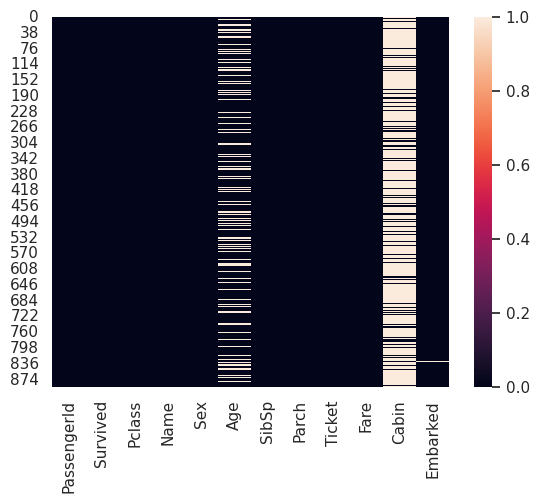

In [121]:
# display the missing values on a graph/plot
sns.heatmap(train_data.isnull())



```
The dataset contains missing values in three columns:
Age: 177 missing values (19.87%)
Cabin: 687 missing values (77.10%)
Embarked: 2 missing values (0.22%)
```



In [122]:
# Calculating the percentage of missing values
total_rows = len(train_data)
percentage_missing = (missing_values / total_rows) * 100
print("\nPercentage of missing values in each column:\n", percentage_missing[percentage_missing > 0])


Percentage of missing values in each column:
 Age         19.865320
Cabin       77.104377
Embarked     0.224467
dtype: float64


**Age**

* Mean Imputation: Filling missing values with the average age.
This is an effective and straightforward initial approach, but it may not be the optimal solution in all scenarios.

* We observed that the 'Age' column contains 177 missing values, representing approximately 20% of the data. Additionally, age can be a significant factor in predicting survival.

* Therefore, we decided against using simple mean imputation. This method could distort the natural age distribution and overlook significant variations in age among different passenger groups (e.g., based on passenger class or gender).

We created a new column named 'Title' by extracting titles (e.g., Mr., Mrs., Miss., Master.) from the 'Name' column. These titles can provide an indication of the passenger's age.

In [123]:
# Extracting titles from the 'Name' column
train_data['Title'] = train_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Display title distribution for verification
print(train_data['Title'].value_counts())

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Ms            1
Mme           1
Don           1
Lady          1
Sir           1
Capt          1
Countess      1
Jonkheer      1
Name: count, dtype: int64


We grouped the data by 'Pclass' (passenger class) and 'Title', and calculated the median age for each resulting group. Using the median helps mitigate the impact of potential outliers.

In [124]:
# Calculate median age per Pclass and Title group
median_ages = train_data.groupby(['Pclass', 'Title'])['Age'].median()

# Display median ages per group
print(median_ages)

Pclass  Title   
1       Capt        70.0
        Col         58.0
        Countess    33.0
        Don         40.0
        Dr          46.5
        Jonkheer    38.0
        Lady        48.0
        Major       48.5
        Master       4.0
        Miss        30.0
        Mlle        24.0
        Mme         24.0
        Mr          40.0
        Mrs         41.5
        Sir         49.0
2       Dr          38.5
        Master       1.0
        Miss        24.0
        Mr          31.0
        Mrs         32.0
        Ms          28.0
        Rev         46.5
3       Master       4.0
        Miss        18.0
        Mr          26.0
        Mrs         31.0
Name: Age, dtype: float64


We defined a function to fill missing values in the 'Age' column using the corresponding median age based on the passenger's 'Pclass' and 'Title'. We applied this function to each row in the dataset.

In [125]:
# Function to impute age based on Pclass and Title
def impute_age(row):
    if pd.isnull(row['Age']):
        # Use .loc for safe access based on multi-index (Pclass, Title)
        return median_ages.loc[row['Pclass'], row['Title']]
    return row['Age']

# Apply the function to each row in train_data
train_data['Age'] = train_data.apply(impute_age, axis=1)

# Check the number of missing values in 'Age' after imputation
print("Number of missing values in 'Age' column after imputation (using Pclass and Title):", train_data['Age'].isnull().sum())

Number of missing values in 'Age' column after imputation (using Pclass and Title): 0


We verified that the number of missing values in the 'Age' column is now 0. We also spot-checked some of the imputed values by comparing them against the calculated median ages for their respective groups.

In [126]:
# Identify indices of rows where 'Age' was originally missing
# Re-reading the original data's 'Age' column to get the original null mask
original_missing_age_indices = pd.read_csv('train.csv')['Age'].isnull()
# Get the index labels from train_data corresponding to original nulls
missing_indices = train_data.index[original_missing_age_indices].tolist()
print("Indices of rows where 'Age' was originally missing:", missing_indices)

# Display 'Pclass', 'Title', and imputed 'Age' for these rows
print("\n'Pclass', 'Title', and 'Age' values after imputation for originally missing rows:\n", train_data.loc[missing_indices, ['Pclass', 'Title', 'Age']])

Indices of rows where 'Age' was originally missing: [5, 17, 19, 26, 28, 29, 31, 32, 36, 42, 45, 46, 47, 48, 55, 64, 65, 76, 77, 82, 87, 95, 101, 107, 109, 121, 126, 128, 140, 154, 158, 159, 166, 168, 176, 180, 181, 185, 186, 196, 198, 201, 214, 223, 229, 235, 240, 241, 250, 256, 260, 264, 270, 274, 277, 284, 295, 298, 300, 301, 303, 304, 306, 324, 330, 334, 335, 347, 351, 354, 358, 359, 364, 367, 368, 375, 384, 388, 409, 410, 411, 413, 415, 420, 425, 428, 431, 444, 451, 454, 457, 459, 464, 466, 468, 470, 475, 481, 485, 490, 495, 497, 502, 507, 511, 517, 522, 524, 527, 531, 533, 538, 547, 552, 557, 560, 563, 564, 568, 573, 578, 584, 589, 593, 596, 598, 601, 602, 611, 612, 613, 629, 633, 639, 643, 648, 650, 653, 656, 667, 669, 674, 680, 692, 697, 709, 711, 718, 727, 732, 738, 739, 740, 760, 766, 768, 773, 776, 778, 783, 790, 792, 793, 815, 825, 826, 828, 832, 837, 839, 846, 849, 859, 863, 868, 878, 888]

'Pclass', 'Title', and 'Age' values after imputation for originally missing rows:
  

Cabin: This column contained a large number of missing values (687, approx. 77.1%). We decided to adopt the following strategy:

* Create a new 'Deck' feature: We extracted the first letter from the 'Cabin' values, assuming it represents the deck level.
* Handle missing 'Deck' values: We filled the missing (NaN) values in the new 'Deck' column with 'M' (for Missing).
* Drop the original 'Cabin' column: We then removed the original 'Cabin' column from the dataset.

In [127]:
# Create 'Deck' feature by extracting the first letter from 'Cabin'
train_data['Deck'] = train_data['Cabin'].str[0]

# Fill missing values in 'Deck' with 'M'
train_data['Deck'] = train_data['Deck'].fillna('M')

# Drop the original 'Cabin' column
# errors='ignore' prevents an error if 'Cabin' was already dropped
train_data.drop('Cabin', axis=1, inplace=True, errors='ignore')

# Display 'Deck' category distribution for verification
print(train_data['Deck'].value_counts())

Deck
M    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: count, dtype: int64


Embarked

* Mode imputation strategy: Filling missing values with the most frequent value (the mode).

* Highly effective and appropriate in this case, as the proportion of missing values is negligible (less than 0.25%, only two values).

* It's also a common choice for categorical data with a small number of missing values. It addresses the issue without introducing significant bias, since we are using the most likely value based on the existing data.

In [128]:
# Calculate the mode for the 'Embarked' column
most_frequent_embarked = train_data['Embarked'].mode()[0]

# Fill missing values in the 'Embarked' column with the mode
train_data['Embarked'] = train_data['Embarked'].fillna(most_frequent_embarked)

# To check the number of missing values.
print("Number of missing values in 'Embarked' column after imputation:", train_data['Embarked'].isnull().sum())

Number of missing values in 'Embarked' column after imputation: 0


In [129]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,M
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,M
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr,M




---



# **4. Outliers Detection**

Plot box plots or histograms to identify outliers in numerical features. Consider the nature of your data and determine whether outliers should be removed, transformed, or treated separately.



```
Age: Some outliers exist towards older ages (greater than ~65-70 years).
SibSp: Some outliers exist for larger numbers (greater than 2 or 3).
Parch: Some outliers exist for larger numbers (greater than 2 or 3).
Fare: Several outliers exist for very high fares (greater than ~$65-70).
```



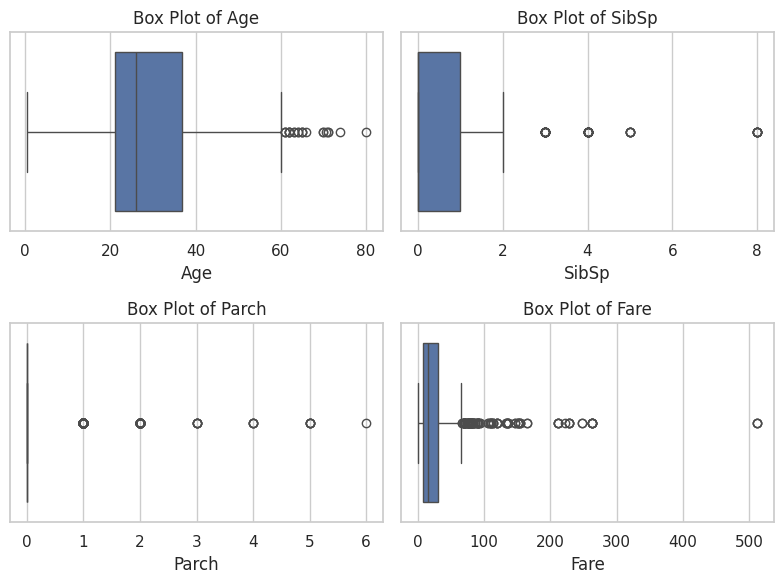

In [130]:
# List of numerical features to check for outliers
numerical_features_for_outliers = ['Age', 'SibSp', 'Parch', 'Fare']

# Create a figure and set its size
plt.figure(figsize=(8, 6))
for i, feature in enumerate(numerical_features_for_outliers):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=train_data[feature])
    plt.title(f'Box Plot of {feature}')

# Adjust layout for clarity (prevents overlapping)
plt.tight_layout()
plt.show()

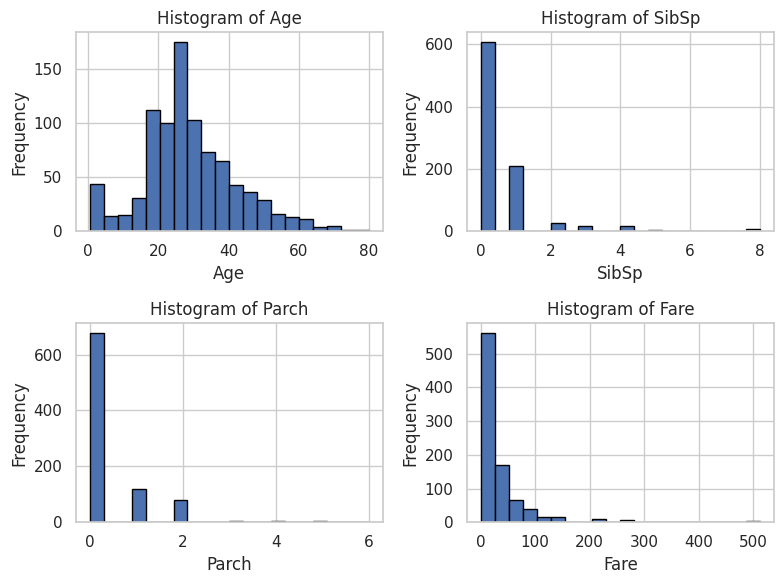

In [131]:
# List of numerical features for histograms
numerical_features_for_histograms = ['Age', 'SibSp', 'Parch', 'Fare']

# Create a figure and set its size
plt.figure(figsize=(8, 6))
for i, feature in enumerate(numerical_features_for_histograms):
    plt.subplot(2, 2, i + 1)
    plt.hist(train_data[feature].dropna(), bins=20, edgecolor='black')
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Objective: Detect and address outliers in the key numerical features (Age, Fare, SibSp, Parch) using box plots and histograms, and make an informed decision on how to handle them (remove, cap, or keep) based on the data's nature.

Preliminary Visualizations: (The box plots and histograms generated previously for these four features indicated the presence of potential outliers in all of them).

**Age**

4.1 Analyzing and Handling the 'Age' Column:

* Observation: Visualizations indicated the presence of outliers for older ages.
* Decision: Keep these ages as they might be genuine, but apply capping to limit the influence of very extreme values on future models.
* Rationale for Cap: The 99th percentile was chosen as the capping limit (previously calculated as 65.0) because it represents a value based on the actual data distribution.
* Action: Apply capping at 65.0.

Calculated 99th percentile for Age: 65.0
Maximum Age after capping at 65.0: 65.0


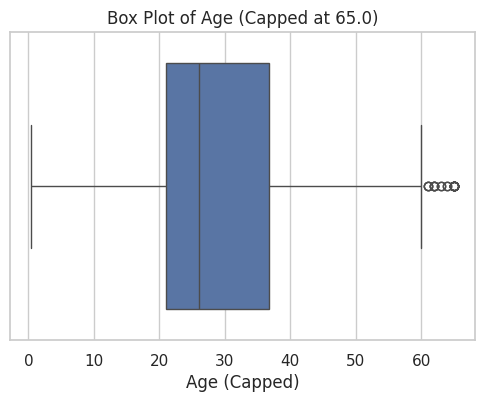

In [132]:
# Age Outlier Handling

# Calculate the 99th percentile for Age to confirm and set the limit
# ('Age' column after imputation)
age_99_percentile = train_data['Age'].quantile(0.99)
print(f"Calculated 99th percentile for Age: {age_99_percentile:.1f}")

# Apply capping at the 99th percentile
train_data['Age'] = train_data['Age'].clip(upper=age_99_percentile)

# Verify the maximum age after capping
print(f"Maximum Age after capping at {age_99_percentile:.1f}: {train_data['Age'].max()}")

plt.figure(figsize=(6, 4))
sns.boxplot(x=train_data['Age'])
plt.title(f'Box Plot of Age (Capped at {age_99_percentile:.1f})')
plt.xlabel('Age (Capped)')
plt.show()

**Fare**

4.2 Analysis and Handling of the 'Fare' Column:

* Observation: Visualizations indicated numerous very high outliers and a significant right skew. The presence of zero values was also noted.
* Decision: Keep all these values at this stage (Step 4). The high values are considered genuine and important data (often representing first class). The significant skewness will be addressed via log transformation (log1p) in a later step (Step 6 or 8).
* Action: No direct modification to the values in Step 4.

In [133]:
# Fare Outlier Handling

# Log transformation will be considered later to handle skewness.
print("Fare: Outliers were kept. No capping or removal applied.")

Fare: Outliers were kept. No capping or removal applied.


**SibSp**

4.3 Analysis and Handling of the 'SibSp' Column:

* Observation: Visualizations indicated some outliers for high values (e.g., 5 and 8).
* Decision: Keep these values as they could represent genuine large families. Will consider combining this with 'Parch' into a 'FamilySize' feature later (Step 8).
* ction: No direct modification to the values in Step 4.

In [134]:
# SibSp Outlier Handling

# Feature engineering (like FamilySize) will be considered later.
print("SibSp: Outliers were kept. No capping or removal applied .")

SibSp: Outliers were kept. No capping or removal applied .


**Parch**

4.4 Analysis and Handling of the 'Parch' Column:

* Observation: Visualizations indicated some outliers for high values (e.g., 4, 5, 6).
* Decision: Keep these values as they could represent genuine large families. Will consider combining this with 'SibSp' into a 'FamilySize' feature later (Step 8).
* Action: No direct modification to the values in Step 4.

In [135]:
# Parch Outlier Handling

# Feature engineering (like FamilySize) will be considered later.
print("Parch: Outliers were kept. No capping or removal applied.")

Parch: Outliers were kept. No capping or removal applied.


**Summary of Step 4:**

Outliers in the key numerical columns (Age, Fare, SibSp, Parch) were analyzed. Based on the analysis and the nature of the data:

* Capping was applied to the Age column at the 99th percentile (65.0) to limit the impact of extreme values.
* Outliers in the Fare, SibSp, and Parch columns were kept as they are considered genuine and important data, with plans to address Fare's skewness and improve SibSp/Parch representation (through feature engineering) in later steps.



---



# **5. Data Visualization**

Create visualizations to gain insights into the data. Scatter plots, histograms, bar plots, and heatmaps can help visualize relationships between features and identify potential correlations or patterns.

* Strongly confirms the association of higher survival with Pclass = 1 and young age (children).
* Illustrates the distribution of Pclass (majority of 3) and SibSp/Parch (majority of 0 or 1).
* Suggests a better survival pattern for passengers with a small number of relatives (1-3) compared to those traveling alone or in large families.
* Provides a comprehensive overview of the relationships and distributions.

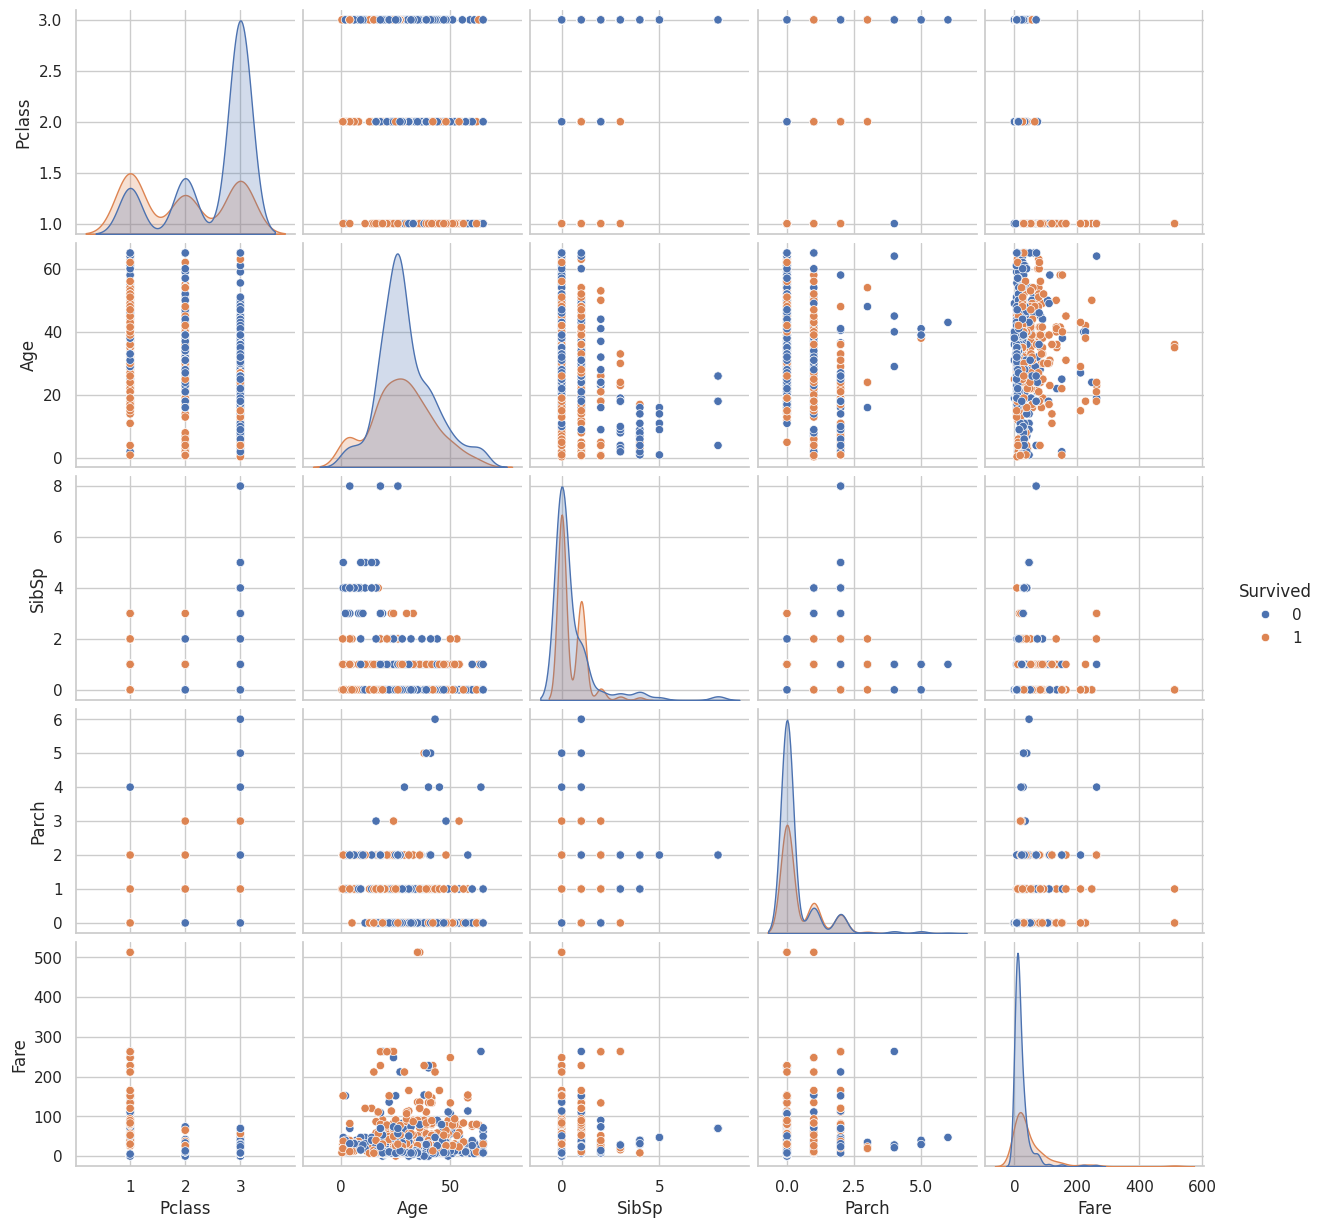

In [136]:
# The relationships between pairs of the specified features and the distribution of each one.
sns.pairplot(train_data, vars=['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], hue='Survived')
plt.show()

**Survival Distribution (Survived)**

The plot shows that the number of passengers who did not survive (Class 0, approx. 550) is notably higher than the number of survivors (Class 1, approx. 340) in the training sample. This indicates an overall survival rate below 50% and some imbalance between the two classes.

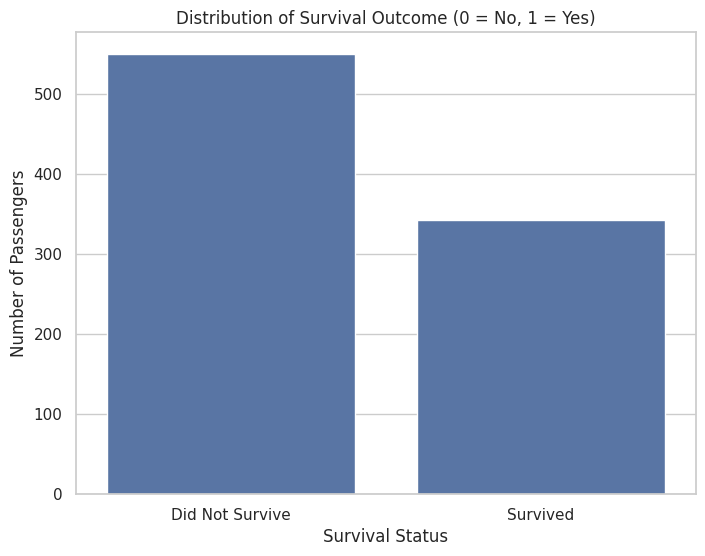

In [137]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 6)) # Appropriate size for this plot

# Create the plot
sns.countplot(x='Survived', data=train_data)

# Add a title and clearer axis labels
plt.title('Distribution of Survival Outcome (0 = No, 1 = Yes)')
plt.xlabel('Survival Status')
plt.ylabel('Number of Passengers')
plt.xticks(ticks=[0, 1], labels=['Did Not Survive', 'Survived'])

plt.show()

**Survival by Sex**

The plot reveals a significant difference in survival rates between the sexes. The vast majority of males in the sample did not survive, while the vast majority of females survived. This strongly indicates that Sex is a highly influential factor in determining the chances of survival aboard the Titanic.

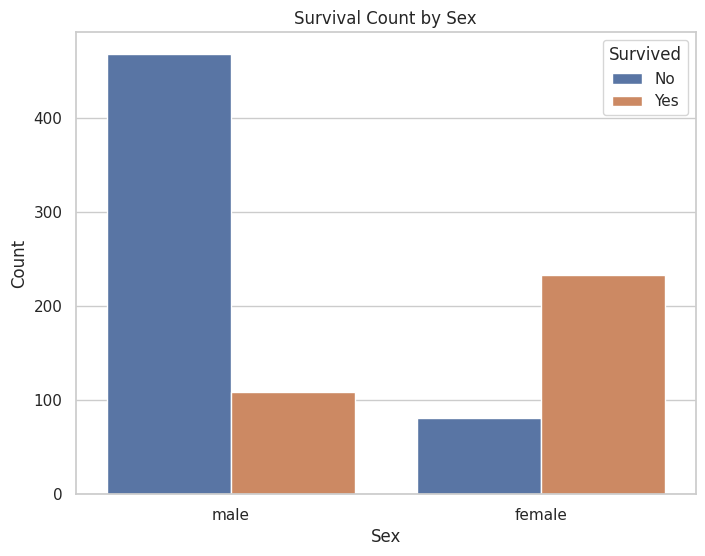

In [138]:
# Bar Plot – Survivor Count by Sex
plt.figure(figsize=(8, 6))
sns.countplot(data=train_data, x='Sex', hue='Survived')
plt.title('Survival Count by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

**Survival by Passenger Class (Pclass)**

The plot displays a very clear trend associated with passenger class:

* First Class (1): The survival rate is the highest (number of survivors is greater than non-survivors).
* Second Class (2): The survival rate is moderate (number of survivors and non-survivors are relatively close).
* Third Class (3): The survival rate is the lowest by a large margin (number of non-survivors is much larger than survivors).

This strongly indicates that Passenger Class (Pclass) is a very important and influential factor in predicting survival chances.

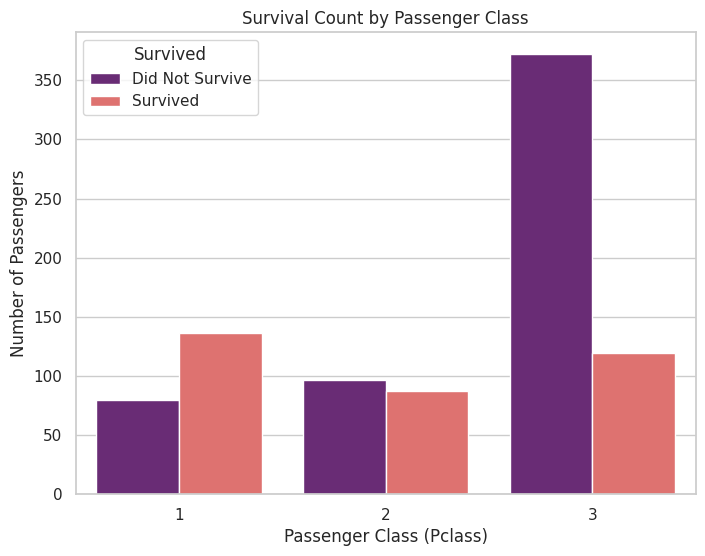

In [139]:
plt.figure(figsize=(8, 6))
# Create the plot: Pclass on the x-axis, and Survived to color the bars
sns.countplot(x='Pclass', hue='Survived', data=train_data, palette='magma')

# Title and axis labels
plt.title('Survival Count by Passenger Class')
plt.xlabel('Passenger Class (Pclass)')
plt.ylabel('Number of Passengers')

plt.legend(title='Survived', labels=['Did Not Survive', 'Survived'])

plt.show()

**Histogram of Age by Survival**

This histogram compares the age distribution of survivors (Blue) with non-survivors (Orange):

* A higher proportion of survivors is clearly observed among children (approximately under 10 years old), suggesting priority or a higher chance of survival for them.
* The young adult age group (20-35 years) contains the largest number of non-survivors.
* Conclusion: Age appears to be related to survival, with a clear advantage for young children.

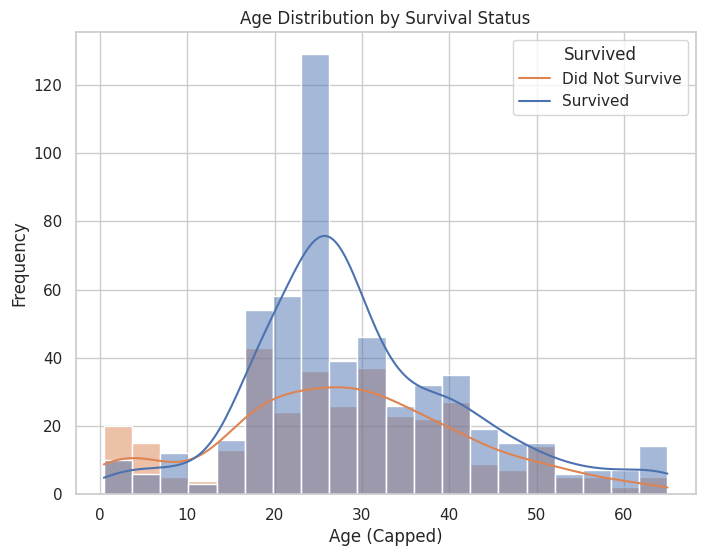

In [140]:
plt.figure(figsize=(8, 6))
# Basic plot command with kde (density curve helps understand the shape)
sns.histplot(data=train_data, x='Age', hue='Survived', kde=True)

# Add title and labels
plt.title('Age Distribution by Survival Status')
plt.xlabel('Age (Capped)')
plt.ylabel('Frequency')

plt.legend(title='Survived', labels=['Did Not Survive', 'Survived'])
plt.show()

**Box Plot of Original Fare by Survival**

* This plot compares the distribution of the original fare between survivors (Orange) and non-survivors (Purple). The effect of the significant fare skewness is evident in the compressed boxes and the presence of numerous high outliers. However, it is clearly observed that the median fare and the Interquartile Range (IQR) for survivors are higher than their counterparts for non-survivors.

* Conclusion: This strongly suggests that passengers who paid higher fares had a better chance of survival. This plot confirms the importance of Fare as an influential factor and also justifies the benefit of using the log transformation (Fare_log) later for better analysis and visualization.

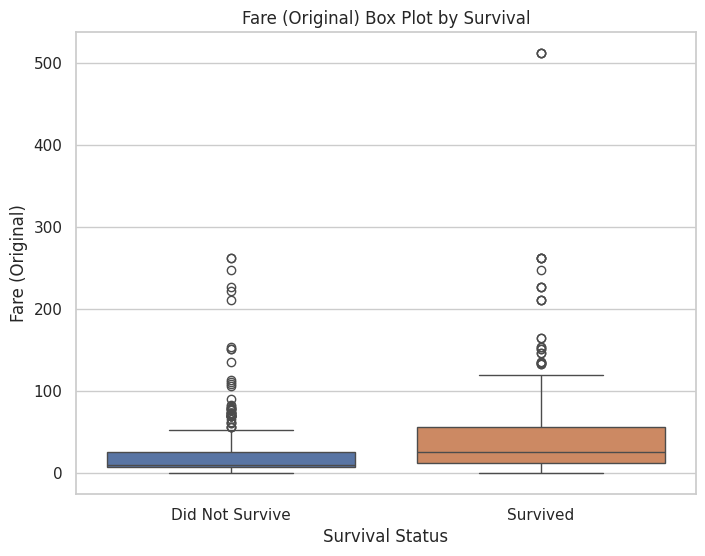

In [141]:
plt.figure(figsize=(8, 6))
# Define the column and label
fare_col = 'Fare_log' if 'Fare_log' in train_data.columns else 'Fare'
fare_lbl = 'Fare (Log Transformed)' if fare_col == 'Fare_log' else 'Fare (Original)'

sns.boxplot(data=train_data, x='Survived', y=fare_col, hue='Survived', legend=False)

plt.title(f'{fare_lbl} Box Plot by Survival')
plt.ylabel(fare_lbl)
plt.xlabel('Survival Status')
plt.xticks(ticks=[0, 1], labels=['Did Not Survive', 'Survived'])

plt.show()

**Survival by Port of Embarkation (Embarked)**

This plot shows differing survival rates based on the port of embarkation:

* Cherbourg (C): Shows the highest survival rate, where the number of survivors is greater than non-survivors (over 50% survived).
* Southampton (S) & Queenstown (Q): Show much lower survival rates (less than 50%), where the number of non-survivors is greater than the number of survivors for both ports.
* Note: This difference might be partially linked to the distribution of passenger classes (Pclass) at each port (as Cherbourg is known to have had a higher proportion of first-class passengers).

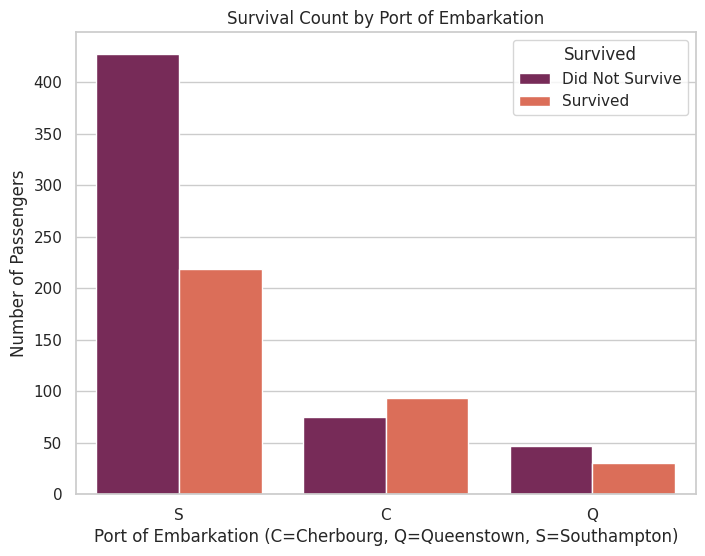

In [142]:
plt.figure(figsize=(8, 6))
# Create the plot: Embarked on the x-axis, Survived to color the bars
sns.countplot(x='Embarked', hue='Survived', data=train_data, palette='rocket')

# Add title and axis labels
plt.title('Survival Count by Port of Embarkation')
plt.xlabel('Port of Embarkation (C=Cherbourg, Q=Queenstown, S=Southampton)')
plt.ylabel('Number of Passengers')

# Add the legend
plt.legend(title='Survived', labels=['Did Not Survive', 'Survived'])

plt.show()

**Scatter Plot of Age and Original Fare (Colored by Passenger Class)**
This plot illustrates the relationship between Age and Original Fare, colored by Passenger Class (Pclass):

* It strongly shows that Fare is significantly correlated with Passenger Class (Pclass), as the classes are clearly separated along the Y-axis (Fare). First-class passengers paid the highest fares, while third-class passengers paid the lowest.
* There is no clear linear relationship between Age and Fare overall.
* Almost all age groups are represented across each passenger class.
* Conclusion: The plot confirms the strong correlation between Fare and Pclass, while Age does not seem to be a primary factor in determining the fare paid.

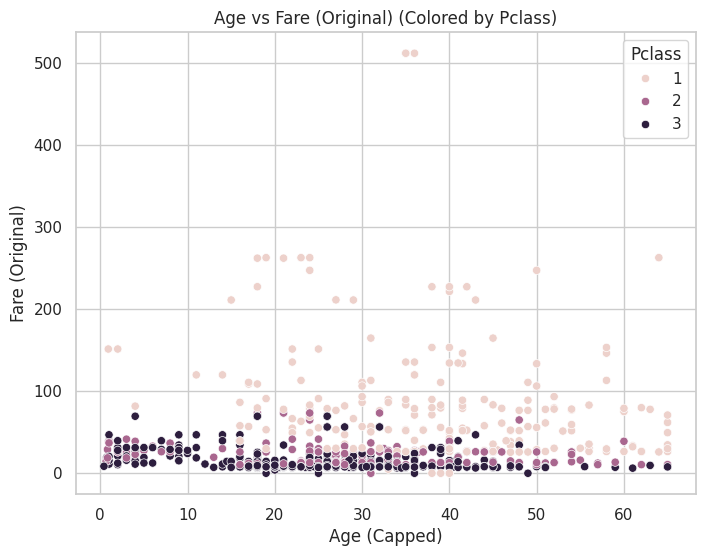

In [143]:
# Define the column and label
plt.figure(figsize=(8, 6))
fare_col = 'Fare_log' if 'Fare_log' in train_data.columns else 'Fare'
fare_lbl = 'Fare (Log Transformed)' if fare_col == 'Fare_log' else 'Fare (Original)'

# Create the scatter plot
sns.scatterplot(data=train_data, x='Age', y=fare_col, hue='Pclass')

# Add title and basic labels
plt.title(f'Age vs {fare_lbl} (Colored by Pclass)')
plt.xlabel('Age (Capped)') # Age is capped
plt.ylabel(fare_lbl) # Use the correct label for Fare

plt.show()

**Age and Fare Scatter by Survival**

The plot shows significant overlap between survivors (orange/red) and non-survivors (blue) when plotting Age against Original Fare. There is no clear separation between the categories, although survivors tend to appear at very high fare levels.

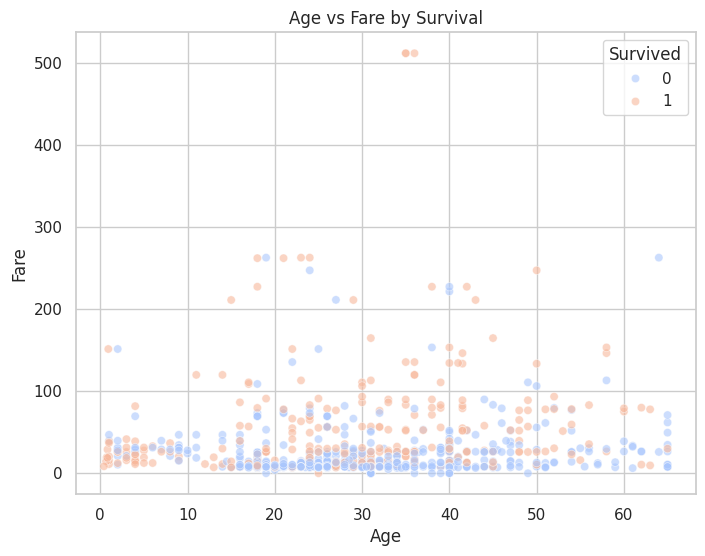

In [144]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=train_data, x='Age', y='Fare', hue='Survived', palette='coolwarm', alpha=0.6)

# Title and labels
plt.title('Age vs Fare by Survival')
plt.xlabel('Age')
plt.ylabel('Fare')

plt.show()



---



# **6. Feature Distribution**

Examine the distribution of each feature to determine if any transformations are necessary, such as logarithmic or power transformations, to achieve a more normal distribution.

**Distribution Check for Key Numerical Features (Age, Fare, SibSp, Parch)**

The distribution of the four key numerical features was examined, and their skewness coefficients were calculated to determine the need for applying transformations. The results were as follows:

* Age: Showed a reasonably symmetrical distribution (after capping) with low skewness (≈ 0.38). Therefore, no further transformation is needed.
* Fare: Exhibited very high right-skewness (≈ 4.79), necessitating the application of a transformation (the log1p logarithmic transformation will be used).
* SibSp (Siblings/Spouses): Showed high skewness (≈ 3.70), but it was decided not to transform it currently (due to its nature as count data and the possibility of later feature engineering).
* Parch (Parents/Children): Showed high skewness (≈ 2.75), and it was decided not to transform it currently for the same reasons as SibSp.

--- Analyzing Distribution of Age ---


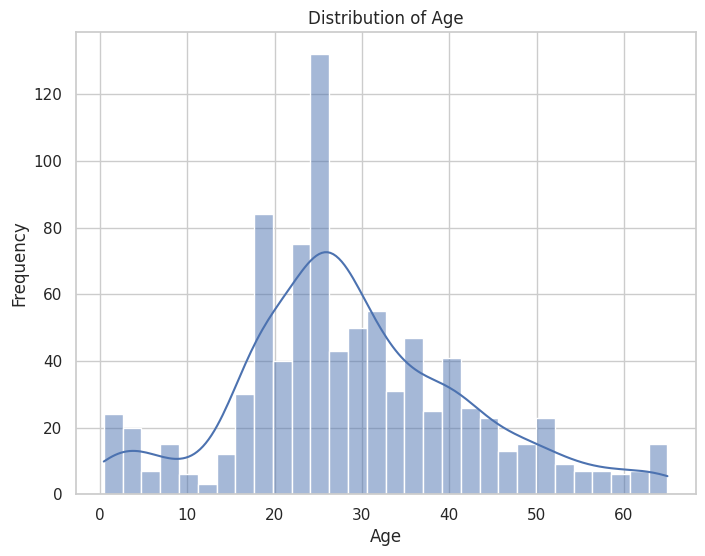

Skewness coefficient for Age: 0.38


In [145]:
feature = 'Age'

plt.figure(figsize=(8, 6))
print(f"--- Analyzing Distribution of {feature} ---")
sns.histplot(train_data[feature], kde=True, bins=30)
plt.title(f'Distribution of {feature}')
plt.xlabel(feature)
plt.ylabel('Frequency')
plt.show()

# Calculate and print skewness
skew = train_data[feature].skew()
print(f"Skewness coefficient for {feature}: {skew:.2f}")

--- Analyzing Distribution of Fare ---


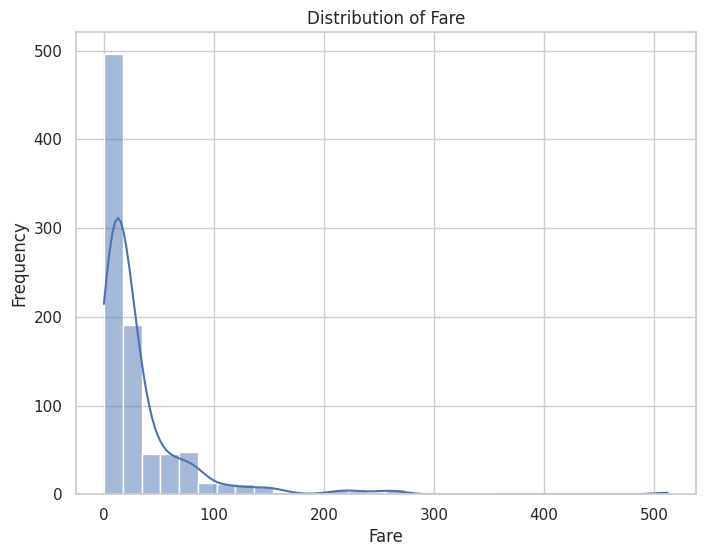

Skewness coefficient for Fare: 4.79


In [146]:
feature = 'Fare'

plt.figure(figsize=(8, 6))
print(f"--- Analyzing Distribution of {feature} ---")
sns.histplot(train_data[feature], kde=True, bins=30)
plt.title(f'Distribution of {feature}')
plt.xlabel(feature)
plt.ylabel('Frequency')
plt.show()

# Calculate and print skewness
skew = train_data[feature].skew()
print(f"Skewness coefficient for {feature}: {skew:.2f}")

--- Analyzing Distribution of SibSp ---


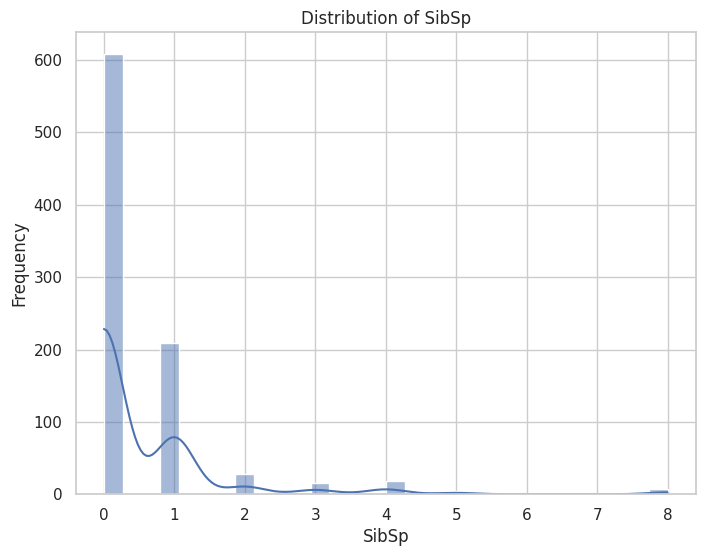

Skewness coefficient for SibSp: 3.70


In [147]:
feature = 'SibSp'

plt.figure(figsize=(8, 6))
print(f"--- Analyzing Distribution of {feature} ---")
sns.histplot(train_data[feature], kde=True, bins=30)
plt.title(f'Distribution of {feature}')
plt.xlabel(feature)
plt.ylabel('Frequency')
plt.show()

# Calculate and print skewness
skew = train_data[feature].skew()
print(f"Skewness coefficient for {feature}: {skew:.2f}")

--- Analyzing Distribution of Parch ---


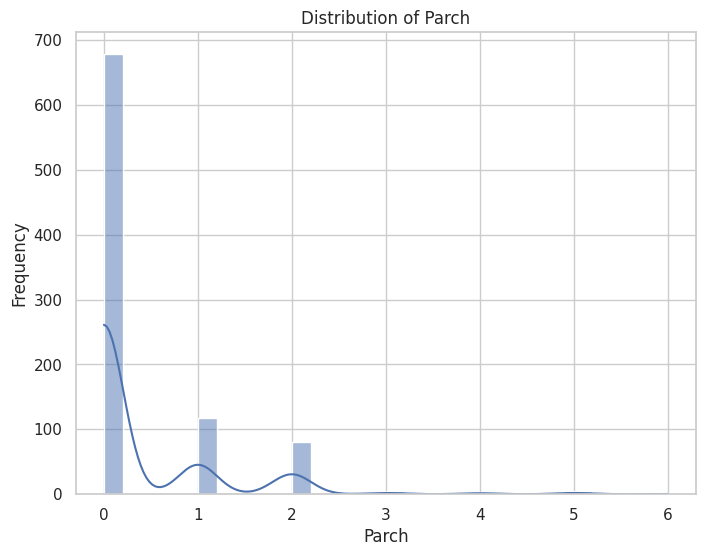

Skewness coefficient for Parch: 2.75


In [148]:
feature = 'Parch'

plt.figure(figsize=(8, 6))
print(f"--- Analyzing Distribution of {feature} ---")
sns.histplot(train_data[feature], kde=True, bins=30)
plt.title(f'Distribution of {feature}')
plt.xlabel(feature)
plt.ylabel('Frequency')
plt.show()

# Calculate and print skewness
skew = train_data[feature].skew()
print(f"Skewness coefficient for {feature}: {skew:.2f}")

**Application and Analysis of Logarithmic Transformation for Fare**

* Procedure: Due to the very high skewness in the original Fare column (~4.79), the logarithmic transformation (numpy.log1p) was applied, and a new column named Fare_log was created.
* Results:
    * Visually: The histogram for Fare_log showed a distribution much more symmetrical and closer to a normal shape compared to the highly skewed original distribution.
    * Numerically: The skewness coefficient decreased significantly from ~4.79 to 0.39, which is a very low value indicating good symmetry for the new distribution.
* Conclusion: The logarithmic transformation was highly effective in addressing the severe skewness issue in the fare data.

The transformed Fare_log column is used for subsequent analyses and modeling that might be affected by skewness.

'Fare_log' column created.


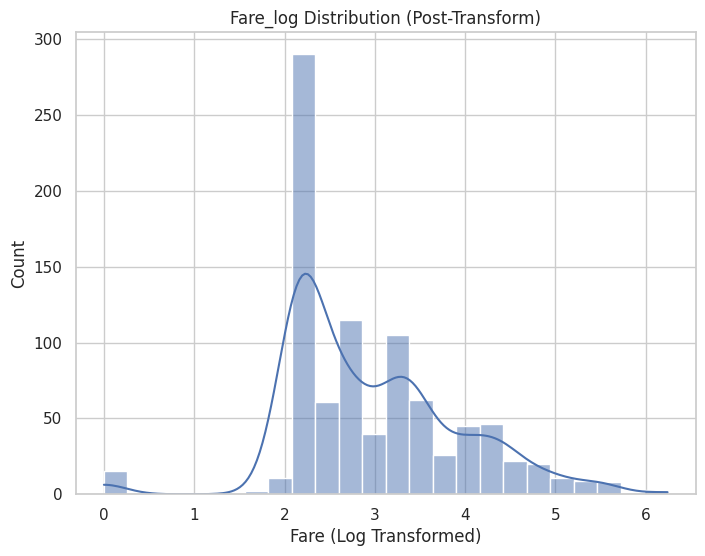

Skewness of Fare_log: 0.39


In [149]:
plt.figure(figsize=(8, 6))
# Apply the transformation and create the new column
train_data['Fare_log'] = np.log1p(train_data['Fare'])
print("'Fare_log' column created.") # Confirmation message for column creation

# (Use default figure size)
sns.histplot(train_data['Fare_log'], kde=True)
plt.title('Fare_log Distribution (Post-Transform)')
plt.xlabel('Fare (Log Transformed)')
plt.show()

# 3. Calculate and display the new skewness
fare_log_skewness = train_data['Fare_log'].skew()
# Print only the new skewness value
print(f"Skewness of Fare_log: {fare_log_skewness:.2f}")



---



# **7. Feature Correlation**

Calculate the correlation matrix or use correlation plots, such as heatmaps, to understand the relationships between numerical features. Identify highly correlated features that may need to be handled, such as through feature selection or dimensionality reduction techniques.

**Feature Correlation**

The correlation matrix was calculated and visualized in the heatmap for the key numerical/ordinal features, using Fare_log instead of the original Fare.

* Strongest linear correlations with Survival (Survived): were observed with Pclass (negative ≈ -0.34) and Fare_log (positive ≈ +0.33).
* Strongest correlations between predictors: a strong negative correlation was observed between Pclass and Fare_log (≈ -0.66), a moderate positive correlation between SibSp/Parch (+0.41), and a moderate negative correlation between Age/Pclass (-0.42).
* Multicollinearity: Despite the notable correlation between Pclass and Fare_log, there are no critically high correlation coefficients (>|0.7|) indicating a critical multicollinearity issue that would necessitate feature removal at this stage.

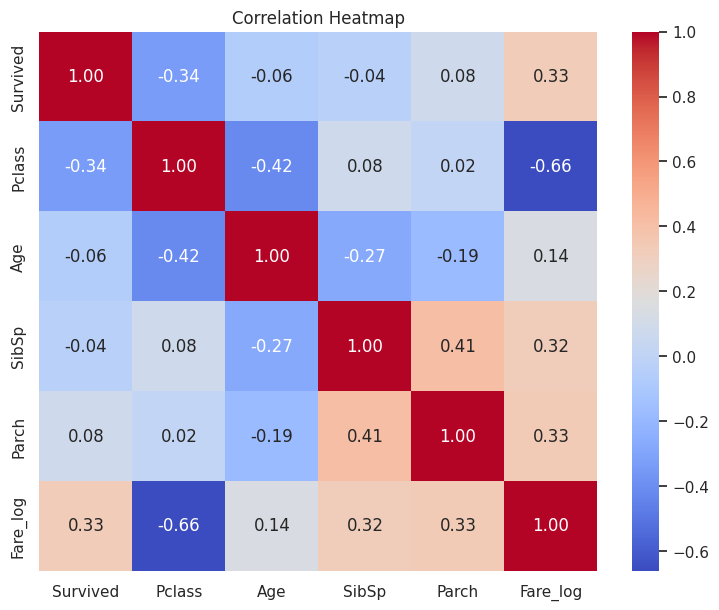

In [150]:
# Define columns (Most important is to use Fare_log if available)
fare_col = 'Fare_log' if 'Fare_log' in train_data.columns else 'Fare'
cols_for_corr = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', fare_col]

# Calculate the correlation matrix
valid_cols = [col for col in cols_for_corr if col in train_data.columns]
if len(valid_cols) > 1:
    correlation_matrix = train_data[valid_cols].corr()

# Visualize the matrix using Heatmap
plt.figure(figsize=(9, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()



---



# **8. Feature Engineering**

Look for opportunities to create new features by combining or transforming existing ones. EDA can help identify potential interactions or nonlinear relationships that can be captured through feature engineering.

**Creating Family Features (FamilySize, IsAlone)**

* Procedure: Two new features were created in this task by combining information from the original relative columns (SibSp, Parch):

1. FamilySize: Calculated as SibSp + Parch + 1 to reflect the total number of family members accompanying the passenger (including the passenger themselves).
2. IsAlone: Created as a binary feature (taking values 0 or 1). Its value is 1 if FamilySize = 1 (i.e., the passenger is traveling alone), and 0 if FamilySize > 1.
* Objective/Rationale: The objective of creating these two features is to simplify the family size information and to test whether "total family size" or "being alone" have a clearer relationship with survival compared to SibSp and Parch separately, as suggested by some visualizations in Step 5.

In [151]:
# Create FamilySize
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1

# Create IsAlone (assumes FamilySize is created)
train_data['IsAlone'] = 0
train_data.loc[train_data['FamilySize'] == 1, 'IsAlone'] = 1

# Quick sample
print(train_data[['FamilySize', 'IsAlone']].head(3))

print("'FamilySize' and 'IsAlone' created.") # Confirmation message at the end

   FamilySize  IsAlone
0           2        0
1           2        0
2           1        1
'FamilySize' and 'IsAlone' created.


**Binning Age into Categories (AgeBin)**

* Procedure: A new categorical column AgeBin was created by dividing the values of the Age column (after capping) into 5 defined categories using the pandas.cut function. The categories and their approximate boundaries are: Child (0-12), Teenager (13-18), Young Adult (19-35), Adult (36-60), Senior (61+).
* Objective/Rationale: The goal of this binning is to help the model capture the non-linear relationship between age and survival chances, which was observed in previous visualizations (especially the higher survival rate for children). Converting age into categories might be more beneficial for some types of models compared to age as a continuous number.
* Note: Most passengers are concentrated in the 'Young Adult' category.

In [152]:
# Define boundaries and labels
# Calculate the max value to ensure all ages are covered
max_age_val = np.ceil(train_data['Age'].max())
age_bins_def = [0, 12, 18, 35, 60, max_age_val]
age_labels_def = ['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']

# Create the new column
train_data['AgeBin'] = pd.cut(train_data['Age'], bins=age_bins_def, labels=age_labels_def, include_lowest=True)

# Confirmation message
print("'AgeBin' column created.")

# To display the distribution
print(train_data['AgeBin'].value_counts())

'AgeBin' column created.
AgeBin
Young Adult    469
Adult          224
Teenager       103
Child           73
Senior          22
Name: count, dtype: int64


**Binning Fare into Categories (FareBin)**

* Procedure: A new categorical column FareBin was created by dividing the values of the Fare_log column (log-transformed fare) into four quartiles (4 categories with approximately equal numbers of observations) using the pandas.qcut function. The resulting categories were named: 'Low', 'Medium', 'High', 'Very High'.
* Objective/Rationale: Converting the continuous fare into discrete categories might help models better understand the impact of different economic levels, and makes it easier to capture potential non-linear relationships with survival.
* Note: The binning process using qcut was successful and resulted in a balanced distribution of passengers across the four categories.

In [153]:
# Define the column (Fare_log)
fare_col = 'Fare_log' if 'Fare_log' in train_data.columns else 'Fare'

# Binning using qcut (with error handling)
try:
    # Define labels and apply qcut directly
    train_data['FareBin'] = pd.qcut(train_data[fare_col], q=4, labels=['Low', 'Medium', 'High', 'Very High'], duplicates='drop')
    print(f"'FareBin' created from column '{fare_col}'.") # Confirmation message

    # Display the distribution for a quick check
    print(train_data['FareBin'].value_counts())

except ValueError as e:
    # Simpler error message if qcut fails
    print(f"Failed to create 'FareBin' using qcut: {e}.")
    print("--> You might need to use pd.cut with manual boundaries as an alternative.")

'FareBin' created from column 'Fare_log'.
FareBin
Medium       224
Low          223
High         222
Very High    222
Name: count, dtype: int64


**Simplifying Title Categories (Title Consolidation)**

* Procedure: The distribution of Titles (Title) previously extracted from names was examined, and a large number of titles with very low frequency were observed. To simplify this categorical feature, the four most common titles were kept: Mr, Miss, Mrs, Master. All other less frequent titles were consolidated into a single new category named Rare.
* Objective/Rationale: Reducing the number of unique categories in the Title column to make it more usable in statistical and machine learning models, and to avoid problems that might arise from very rare categories.
* Result: The Title column now contains only 5 distinct categories, making it simpler and more robust.

In [154]:
# Define common titles
common_titles = ['Mr', 'Miss', 'Mrs', 'Master']

# Replace uncommon titles with 'Rare'
train_data['Title'] = train_data['Title'].apply(lambda x: x if x in common_titles else 'Rare')

# Confirmation message
print("'Title' column simplified.")

# Quick check of the result
print(train_data['Title'].value_counts())

'Title' column simplified.
Title
Mr        517
Miss      182
Mrs       125
Master     40
Rare       27
Name: count, dtype: int64


**Columns Recommended for Dropping Before Modeling**

Based on the feature engineering performed, it is suggested to drop the following columns later before training the model for the reasons mentioned:

* `PassengerId`: Unique identifier with no predictive value.
* `Name`: Useful information was extracted into Title.
* `Ticket`: Complex and unstructured codes, difficult to use directly.
* `Cabin`: Very high percentage of missing values; the more useful Deck feature was extracted from it (if applicable, otherwise dropped due to missingness).
* `SibSp, Parch`: Their information was combined into FamilySize and IsAlone, which might be more effective.
* `Age`: May be replaced by AgeBin which captures the non-linear relationship. (Depends on the final model)
* `Fare`: May be replaced by Fare_log (to handle skewness) or FareBin (for economic categories). (Depends on the final model)
* `Embarked`: (Note: This column is not on our original drop list; it should be kept and later converted to a numerical variable - Encoding).

(Important Clarification: The final decision regarding dropping Age or Fare versus their engineered alternatives may depend on the results of experimenting with different models later).



---



# **<font color='#33b8ff'> Phase 2 </font>**
## **complete working on the dataset**

Libraries and Datasets

In [155]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
from collections import Counter

# Preparing Data for machine learning algorithm

## a. Handling Missing Values:

- Missing values in the Age, Cabin, and Embarked columns were identified and handled.

- Missing Age values were imputed using the median calculated based on Pclass and Title.

- The Cabin column was handled by engineering a Deck feature and dropping the original column.

- Missing Embarked values were filled using the mode.

## b. Encoding Categorical Variables:


**Label Encoding**

**Column:** `Sex`

- Nature: Nominal and contains only two values ​​(male, female).

- Label Encoding: Converts it to 0 and 1 (e.g., female=0, male=1). It's convenient because it's a binary variable.

In [156]:
# Label Encoding for 'Sex'
print("Original 'Sex' values:", train_data['Sex'].unique())

# Define the mapping
sex_mapping = {'female': 0, 'male': 1}
train_data['Sex_Encoded'] = train_data['Sex'].map(sex_mapping)

# Drop the original 'Sex' column as it's replaced by 'Sex_Encoded'
train_data = train_data.drop('Sex', axis=1, errors='ignore')

Original 'Sex' values: ['male' 'female']


**One-Hot Encoding**

**Column:**  Embarked, `Title`, `Deck`

- Nature: Nominal, with no clear logical order between its categories.

- One-Hot Encoding is best suited for these variables. It will create new columns for each category in each original column.

Using Label Encoding (giving numbers such as 0, 1, 2) may suggest a numerical order or relationship to the model.

In [157]:
# One-Hot Encoding for 'Embarked', 'Title', 'Deck'
print("\nColumns before One-Hot Encoding:", train_data.columns)
print("Unique values in 'Embarked':", train_data['Embarked'].unique())
print("Unique values in 'Title':", train_data['Title'].unique())
print("Unique values in 'Deck':", train_data['Deck'].unique())

# Apply get_dummies
train_data = pd.get_dummies(train_data, columns=['Embarked', 'Title', 'Deck'], drop_first=True)


Columns before One-Hot Encoding: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked', 'Title', 'Deck', 'Fare_log', 'FamilySize',
       'IsAlone', 'AgeBin', 'FareBin', 'Sex_Encoded'],
      dtype='object')
Unique values in 'Embarked': ['S' 'C' 'Q']
Unique values in 'Title': ['Mr' 'Mrs' 'Miss' 'Master' 'Rare']
Unique values in 'Deck': ['M' 'C' 'E' 'G' 'D' 'A' 'B' 'F' 'T']


**Ordinal Encoding**

**Column:** `AgeBin`, `FareBin`

- Nature: Ordinal, there is a logical order to the classes.

- Ordinal Encoding is most appropriate. It will assign an integer to each class based on its logical order.

- Why Ordinal? To retain the ordering information between classes.

One-Hot Encoding can also be used, but this may increase the number of columns and the model may not benefit from the ordering information.

In [158]:
# Ordinal Encoding for 'AgeBin', 'FareBin'

# Define the logical order for each column's categories
age_order = ['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']
fare_order = ['Low', 'Medium', 'High', 'Very High']

# Create mapping dictionaries based on the order
age_mapping_ordinal = {category: i for i, category in enumerate(age_order)}
fare_mapping_ordinal = {category: i for i, category in enumerate(fare_order)}

# Apply the mapping to create new ordinal columns
train_data['AgeBin_Ordinal'] = train_data['AgeBin'].map(age_mapping_ordinal)
train_data['FareBin_Ordinal'] = train_data['FareBin'].map(fare_mapping_ordinal)

# drop the original categorical columns if replaced
train_data = train_data.drop(['AgeBin', 'FareBin'], axis=1, errors='ignore')



---



## c. Scaling Numerical Features:



The values ​​are now centered around zero (small positive and negative values).

In [159]:
# Scaling Numerical Features

# Define the numerical columns to scale
# Note: We exclude Pclass as it's categorical, and other binary/encoded features
numerical_cols_to_scale = ['Age', 'Fare_log', 'FamilySize', 'SibSp', 'Parch']

# Initialize the Scaler
scaler = StandardScaler()

# Apply fit_transform to the selected columns in train_data
train_data[numerical_cols_to_scale] = scaler.fit_transform(train_data[numerical_cols_to_scale])



---



## d. Handling Imbalanced Data:


The numbers indicate a moderate imbalance in the dataset.

A 60/40 ratio is considered moderate imbalance, not a very severe imbalance (such as 90/10).

**Skip the imbalance handling step for now.**

- Train and evaluate the initial models and analyze the results.
- Observe the model's performance in predicting the minority group (survivors).


In [160]:
# Check the distribution of the target variable 'Survived'
print(train_data['Survived'].value_counts())

# Calculate percentage
print(train_data['Survived'].value_counts(normalize=True) * 100)

Survived
0    549
1    342
Name: count, dtype: int64
Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64


Preparing data for partitioning (deleting unnecessary columns and defining X and Y)

In [161]:
# Preparing for Splitting

# List columns to drop before defining features (X)
cols_to_drop = ['PassengerId', 'Name', 'Ticket', 'Age', 'Fare', 'SibSp', 'Parch']

# Copy to avoid modifying the original data frame.
train_data_processed = train_data.drop(columns=cols_to_drop, errors='ignore').copy()

# Define Features (X) and Target (y)
X = train_data_processed.drop('Survived', axis=1)
y = train_data_processed['Survived']

print("Shape of features (X):", X.shape)
print("Shape of target (y):", y.shape)

Shape of features (X): (891, 21)
Shape of target (y): (891,)




---



# Data Separation and Model Selection, Model Training and Evaluation


Splitting data into training and testing

In [162]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Distribution in y_train:\n", y_train.value_counts(normalize=True))
print("Distribution in y_test:\n", y_test.value_counts(normalize=True))

Shape of X_train: (712, 21)
Shape of X_test: (179, 21)
Distribution in y_train:
 Survived
0    0.616573
1    0.383427
Name: proportion, dtype: float64
Distribution in y_test:
 Survived
0    0.614525
1    0.385475
Name: proportion, dtype: float64


**SMOTE code**

To prevent data leakage, balance techniques such as SMOTE are applied after the entire dataset has been split into training and test sets.

applying SMOTE did not lead to a clear overall improvement in performance. While it did increase the model's ability to detect survivors (Recall), it reduced the precision of these predictions and slightly lowered the overall accuracy and F1-score for the survivor class.

- The baseline models (especially SVC and LR) provided reasonably good and balanced performance even without SMOTE.

In [163]:
# 1. Prepare and process data before SMOTE
X_train_column_names = None
original_cols = None
if isinstance(X_train, pd.DataFrame):
    original_cols = X_train.columns.tolist()
    X_train_df = X_train
    X_test_df = X_test
elif 'X_train_column_names' in locals() and isinstance(X_train_column_names, list) and X_train.shape[1] == len(X_train_column_names):
    original_cols = X_train_column_names
    X_train_df = pd.DataFrame(X_train, columns=original_cols)
    X_test_df = pd.DataFrame(X_test, columns=original_cols)
else:
    X_train_df = pd.DataFrame(X_train)
    X_test_df = pd.DataFrame(X_test)
    original_cols = X_train_df.columns.tolist()


imputer_original = SimpleImputer(strategy='mean')
X_train_processed = pd.DataFrame(imputer_original.fit_transform(X_train_df), columns=original_cols)
X_test_processed = pd.DataFrame(imputer_original.transform(X_test_df), columns=original_cols)

# Apply SMOTE
# print(f"Class distribution before SMOTE: {Counter(y_train)}") # Can be kept for a quick check
smote_sampler = SMOTE(random_state=42)
X_train_resampled_np, y_train_resampled = smote_sampler.fit_resample(X_train_processed, y_train)
X_train_resampled_df = pd.DataFrame(X_train_resampled_np, columns=original_cols)

# Handle potential NaNs after SMOTE
if X_train_resampled_df.isnull().any().any():
    print("Warning: NaNs found after SMOTE, imputing them now...")
    imputer_after_smote = SimpleImputer(strategy='median')
    X_train_resampled_df = pd.DataFrame(imputer_after_smote.fit_transform(X_train_resampled_df), columns=original_cols)

# Initialize, train, and evaluate models
models_to_evaluate = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "Support Vector Machine (SVC)": SVC(random_state=42, probability=True),
    "Gaussian Naive Bayes": GaussianNB()
}

print("\n--- Model Evaluation Results (with SMOTE and processing) ---")
for model_name, model_instance in models_to_evaluate.items():
    model_instance.fit(X_train_resampled_df, y_train_resampled)
    y_pred = model_instance.predict(X_test_processed)

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print(f"\n--- {model_name} ---")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:\n", report)
    print("-" * 30)


--- Model Evaluation Results (with SMOTE and processing) ---

--- Logistic Regression ---
Accuracy: 0.8156
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.83      0.85       110
           1       0.74      0.80      0.77        69

    accuracy                           0.82       179
   macro avg       0.80      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

------------------------------

--- Support Vector Machine (SVC) ---
Accuracy: 0.7933
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.80      0.83       110
           1       0.71      0.78      0.74        69

    accuracy                           0.79       179
   macro avg       0.78      0.79      0.79       179
weighted avg       0.80      0.79      0.79       179

------------------------------

--- Gaussian Naive Bayes ---
Accuracy: 0.7263
Classification Report:
   



---



The best two models to proceed with to the next stages (Optimization and Tuning) are SVC and Logistic Regression. GaussianNB will be excluded to focus on the models with the best initial performance.

- SVC: Achieved the highest accuracy and looks very promising.
- Logistic Regression: Its performance is very close to SVC and is stable and balanced.
- GaussianNB: Its performance is noticeably lower.

In [112]:
# Model Selection

# Initialize the models (using default parameters for now)
log_reg = LogisticRegression(random_state=42, max_iter=1000)
svc = SVC(random_state=42)
gnb = GaussianNB()

# Logistic Regression
print("Logistic Regression")
# Train the model
log_reg.fit(X_train, y_train)
# Make predictions
y_pred_lr = log_reg.predict(X_test)
# Evaluate
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

# Support Vector Machine (SVC)
print("Support Vector Machine (SVC)")
# Train the model
svc.fit(X_train, y_train)
# Make predictions
y_pred_svc = svc.predict(X_test)
# Evaluate
print("Classification Report:\n", classification_report(y_test, y_pred_svc))

# Gaussian Naive Bayes
print("Gaussian Naive Bayes")
# Train the model
gnb.fit(X_train, y_train)
# Make predictions
y_pred_gnb = gnb.predict(X_test)
# Evaluate
print("Classification Report:\n", classification_report(y_test, y_pred_gnb))

Logistic Regression
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.85      0.86       110
           1       0.77      0.78      0.78        69

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179

Support Vector Machine (SVC)
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.90      0.87       110
           1       0.82      0.74      0.78        69

    accuracy                           0.84       179
   macro avg       0.83      0.82      0.83       179
weighted avg       0.84      0.84      0.84       179

Gaussian Naive Bayes
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.66      0.76       110
           1       0.61      0.86      0.72        69

    accuracy                           0



---



# Optimization and hyperparameters Tuning

**Logistic Regression Tuning**

GridSearchCV identified optimal parameters as C=10 and penalty='l1'.

The optimized model achieved ~83.8% test accuracy, a slight improvement over the baseline.

Performance was strong and balanced for both classes, with slightly improved F1-score and Precision for survivors compared to the baseline.

The tuning successfully yielded an improved model.

In [113]:
# Optimization and Hyperparameter Tuning for Logistic Regression

# Define the parameter grid to search
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'] # liblinear supports l1 and l2
}

# Initialize the base Logistic Regression model
log_reg_base = LogisticRegression(random_state=42, max_iter=1000)

# Initialize GridSearchCV
grid_search_lr = GridSearchCV(estimator=log_reg_base,
                              param_grid=param_grid_lr,
                              cv=5, scoring='accuracy',
                              n_jobs=-1,verbose=1)

# Fit GridSearchCV to the training data
grid_search_lr.fit(X_train, y_train)

# Print the best parameters and the best cross-validation score
print("\nBest Parameters found by Grid Search for Logistic Regression:")
print(grid_search_lr.best_params_)
print("\nBest Cross-validation Accuracy Score:")
print(grid_search_lr.best_score_)

# Evaluate the best model found by Grid Search on the TEST set
print("\nEvaluating the best Logistic Regression model on the Test Set:")
best_lr_model = grid_search_lr.best_estimator_
y_pred_best_lr = best_lr_model.predict(X_test)

print("Test Set Accuracy:", accuracy_score(y_test, y_pred_best_lr))
print("Test Set Classification Report:\n", classification_report(y_test, y_pred_best_lr))

Fitting 5 folds for each of 10 candidates, totalling 50 fits

Best Parameters found by Grid Search for Logistic Regression:
{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}

Best Cross-validation Accuracy Score:
0.8188712695754949

Evaluating the best Logistic Regression model on the Test Set:
Test Set Accuracy: 0.8379888268156425
Test Set Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.87      0.87       110
           1       0.79      0.78      0.79        69

    accuracy                           0.84       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179





---



**Support Vector Classification Tuning**

GridSearchCV found the optimal parameters for SVC to be close to defaults (C=1, gamma='scale', kernel='rbf').

The optimized model's test accuracy remained the same as the baseline SVC (~83.8%), indicating the default settings were already effective within the searched grid.

Performance was strong for non-survivors; for survivors, it showed good precision (0.82) but slightly lower recall (0.74) than the tuned LR, resulting in a good F1-score (~0.78).

The tuning confirmed the effectiveness of default-like parameters for SVC in this case.

In [114]:
# Optimization using GridSearchCV for SVC

# Define the parameter grid for SVC
param_grid_svc = [
  {'C': [0.1, 1, 10, 50], 'kernel': ['linear']},
  {'C': [0.1, 1, 10, 50], 'kernel': ['rbf'], 'gamma': [0.1, 0.01, 0.001, 'scale']},
]

# Initialize the base SVC model
svc_base = SVC(random_state=42, probability=True)

# Initialize GridSearchCV
grid_search_svc = GridSearchCV(estimator=svc_base,
                               param_grid=param_grid_svc,
                               cv=5,
                               scoring='accuracy',
                               n_jobs=-1,
                               verbose=1)

# Fit GridSearchCV to the training data
print("Starting Grid Search for SVC...")
grid_search_svc.fit(X_train, y_train)

# Print the best parameters and the best cross-validation score
print("\nBest Parameters found by Grid Search for SVC:")
print(grid_search_svc.best_params_)
print("\nBest Cross-validation Accuracy Score:")
print(grid_search_svc.best_score_)

# Evaluate the best model found by Grid Search on the TEST set
print("\nEvaluating the best SVC model (from Grid Search) on the Test Set:")
best_svc_model = grid_search_svc.best_estimator_
y_pred_best_svc = best_svc_model.predict(X_test)

print("Test Set Accuracy:", accuracy_score(y_test, y_pred_best_svc))
print("Test Set Classification Report:\n", classification_report(y_test, y_pred_best_svc))

Starting Grid Search for SVC...
Fitting 5 folds for each of 20 candidates, totalling 100 fits

Best Parameters found by Grid Search for SVC:
{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}

Best Cross-validation Accuracy Score:
0.830089628681178

Evaluating the best SVC model (from Grid Search) on the Test Set:
Test Set Accuracy: 0.8379888268156425
Test Set Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.90      0.87       110
           1       0.82      0.74      0.78        69

    accuracy                           0.84       179
   macro avg       0.83      0.82      0.83       179
weighted avg       0.84      0.84      0.84       179



- Both optimized models (Logistic Regression and SVC) achieved the same excellent overall accuracy.

- The LR model showed a slight advantage in the Recall and F1-score metrics for survivors.

- Meanwhile, the SVC model showed a slight advantage in the Precision metric for survivors.

Both models can be considered successful and suitable for the problem.